170508288/170498071 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                      

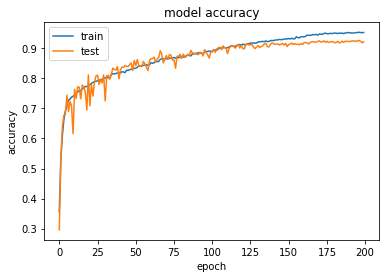

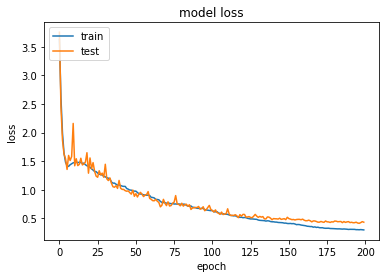

Test loss: 0.4327325224876404
Test accuracy: 0.921999990940094


In [1]:
#vgg3.py 
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np

def impHistoria(history):
  print(history.history.keys())
  plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left'); plt.show()
  plt.plot(history.history['loss']); plt.plot(history.history['val_loss'])
  plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left'); plt.show()

batch_size = 100; num_classes = 10; epochs = 200
nl, nc = 32,32; input_shape = (nl, nc, 3)
(ax, ay), (qx, qy) = cifar10.load_data()
ax = ax.astype('float32'); ax /= 255 #0 a 1
qx = qx.astype('float32'); qx /= 255 #0 a 1
ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)
kweight=5e-4; bweight=5e-4;
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape,kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #20x16x16x3

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #40x8x8x3

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #80x4x4x3

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight))) #160x4x4x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight))) #160x4x4x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight))) #160x4x4x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x2x2x3

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight))) #160x2x2x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight))) #160x2x2x3
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(kweight),bias_regularizer=l2(bweight))) #160x2x2x3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #160x1x1x3

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes,activation='softmax'))

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg3.png', show_shapes=True); model.summary()

datagen = ImageDataGenerator(
  featurewise_center=False,  # set input mean to 0 over the dataset
  samplewise_center=False,  # set each sample mean to 0
  featurewise_std_normalization=False,  # divide inputs by std of the dataset
  samplewise_std_normalization=False,  # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
  height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
  horizontal_flip=True,  # randomly flip images
  vertical_flip=False)  # randomly flip images
datagen.fit(ax)

reduce_lr = ReduceLROnPlateau(monitor='accuracy',
factor=0.9, patience=2, min_lr=0.0001, verbose=True)

opt=optimizers.Adam()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(datagen.flow(ax,ay,batch_size=batch_size), steps_per_epoch=ax.shape[0]//batch_size,
          epochs=epochs, verbose=2, validation_data=(qx, qy),callbacks=[reduce_lr])
impHistoria(history)

score = model.evaluate(qx, qy, verbose=0)
print('Test loss:', score[0]); print('Test accuracy:', score[1])
model.save('vgg3.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')